## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [19]:
df = pd.read_csv('sample_data/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [7]:
df.tail()
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [13]:
df.shape

(2761, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()

,0
DATE,2761
TAG,2761
POSTS,2761


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [20]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45025
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407486
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624562
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813548
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52411
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74290
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919806
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2532080
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68310


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [16]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,199,199
c,199,199
c#,200,200
c++,199,199
delphi,199,199
go,184,184
java,199,199
javascript,199,199
perl,199,199


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [19]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [21]:
df.DATE=pd.to_datetime(df['DATE'])

In [22]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2756,2025-02-01,php,438
2757,2025-02-01,python,2599
2758,2025-02-01,r,579
2759,2025-02-01,ruby,61


## Data Manipulation



In [27]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,90.0,465.0,1589.0,916.0,85.0,177.0,1507.0,1875.0,21.0,650.0,3472.0,785.0,63.0,458.0
2024-11-01,98.0,401.0,1355.0,845.0,56.0,125.0,1259.0,1637.0,20.0,539.0,3138.0,694.0,75.0,386.0
2024-12-01,90.0,328.0,1091.0,689.0,42.0,114.0,1165.0,1388.0,24.0,428.0,2696.0,550.0,53.0,316.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [28]:
reshaped_df.shape

(200, 14)

In [29]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [30]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [31]:
reshaped_df.count()

,0
TAG,
assembly,199
c,199
c#,200
c++,199
delphi,199
go,184
java,199
javascript,199
perl,199


In [36]:
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-12-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [38]:
import  matplotlib.pyplot as plt

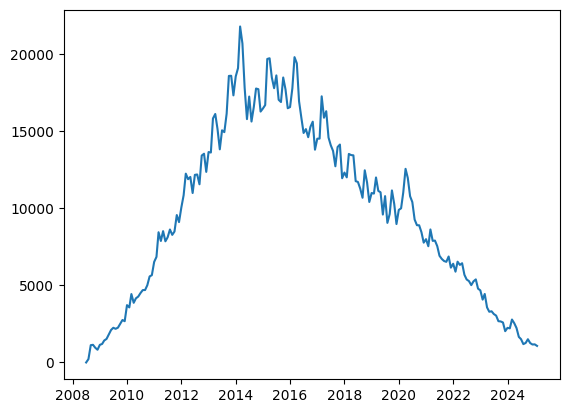

In [39]:
plt.plot(reshaped_df.index, reshaped_df.java)

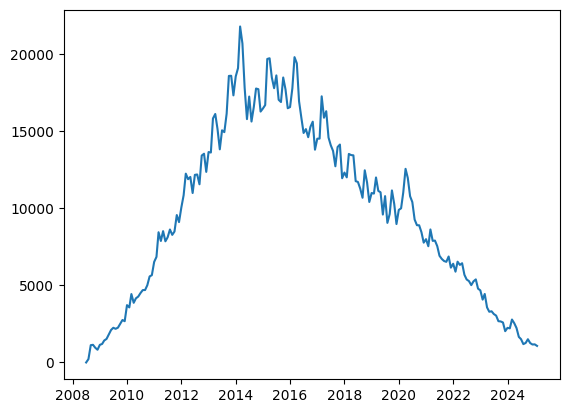

In [40]:
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

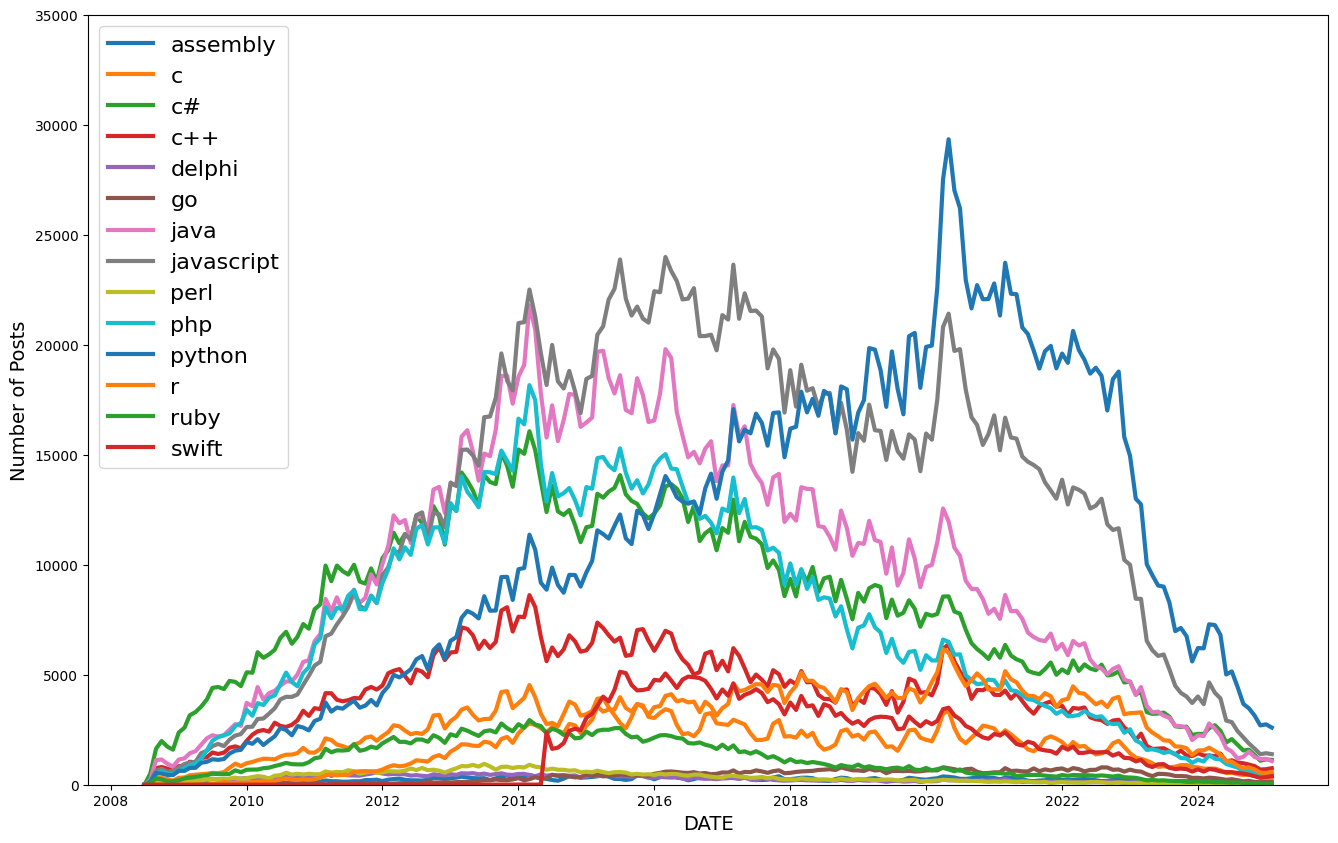

In [51]:
plt.figure(figsize=(16,10))
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
#plt.plot(reshaped_df.index, reshaped_df.java)
#plt.plot(reshaped_df.index, reshaped_df.python) # Tadah!
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],linewidth=3,label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

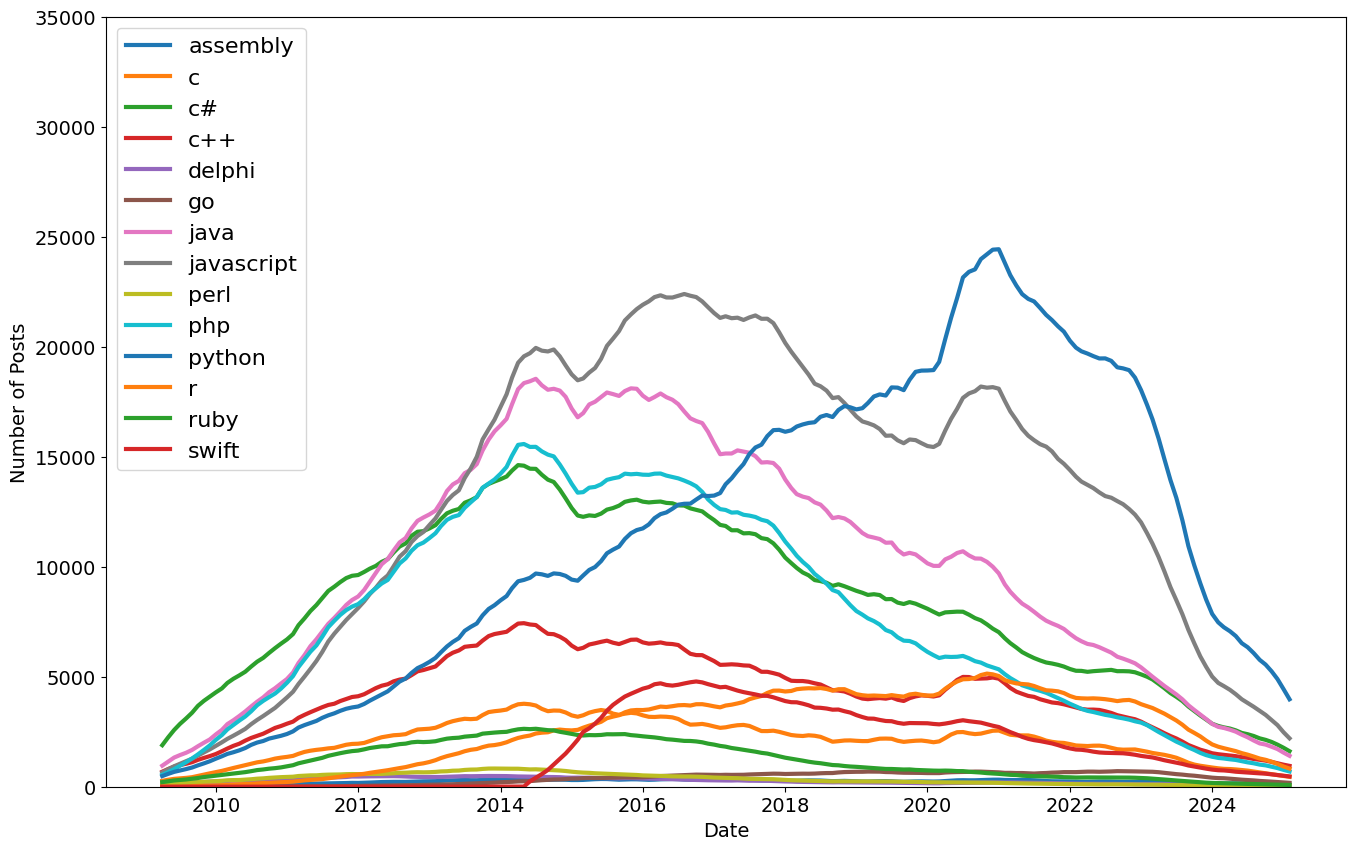

In [55]:
roll_df = reshaped_df.rolling(window=10).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)